In [61]:
import torch
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap


Board = torch.ones((8, 8))
# Board[1:2] = 2
# print(Board)
color_black = 3
color_white = 0
Board[6:7] = color_black
Board[1:2] = color_white

white_pawn = {"p1":(6,0),"p2":(6,1),"p3":(6,2),"p4":(6,3),"p5":(6,4),"p6":(6,5),"p7":(6,6),"p8":(6,7)}
black_pawn = {"p1":(1,0),"p2":(1,1),"p3":(1,2),"p4":(1,3),"p5":(1,4),"p6":(1,5),"p7":(1,6),"p8":(1,7)}

(6, 2)
tensor([0])
firstmovewhite
hlo


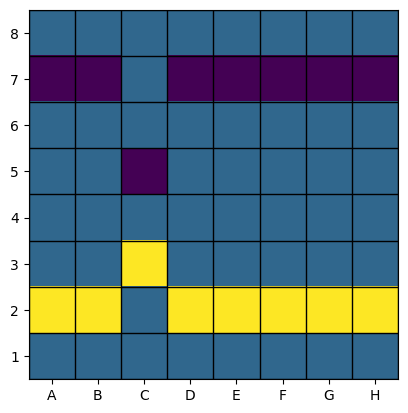

{2: tensor(1.)}
(6, 7)
tensor([1])
firstmovewhite
hlo


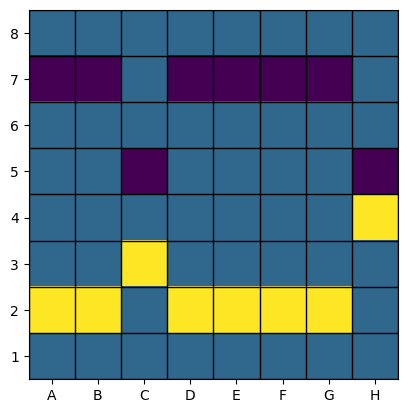

{2: tensor(1.), 7: tensor(1.)}
(6, 0)
tensor([1])
firstmovewhite
hlo


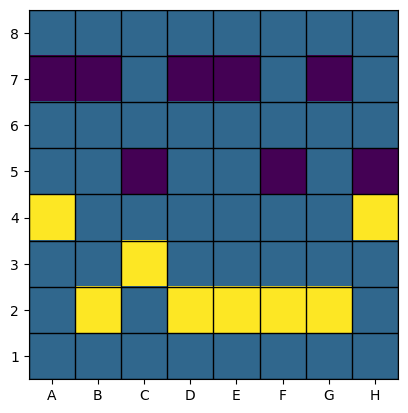

{2: tensor(1.), 7: tensor(1.), 5: tensor(1.)}
(6, 4)
tensor([0])
firstmovewhite
hlo


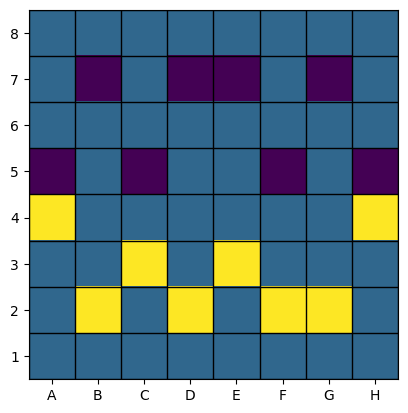

{2: tensor(1.), 7: tensor(1.), 5: tensor(1.), 0: tensor(1.)}
(6, 1)
tensor([1])
firstmovewhite
kill_check
front_check
kill_check
front_check
kill_check
front_check
kill_check
front_check
kill_check
front_check
kill_check
front_check
kill_check
front_check
kill_check
front_check
kill_check
front_check
kill_check
front_check
kill_check
front_check
kill_check
front_check
kill_check
front_check
kill_check
front_check
kill_check
front_check
kill_check
front_check
kill_check
front_check
kill_check
front_check
kill_check
front_check
kill_check
front_check
kill_check
front_check
kill_check
front_check
kill_check
front_check
kill_check
front_check
kill_check
front_check
kill_check
front_check
kill_check
front_check
kill_check
front_check
kill_check
front_check
kill_check
front_check
kill_check
front_check
kill_check
front_check
kill_check
front_check
kill_check
front_check
kill_check
front_check
kill_check
front_check
kill_check
front_check


IndexError: index 8 is out of bounds for dimension 1 with size 8

In [ ]:
prev_value_black = {}
prev_value_white = {}

for i in range(64):
    def get_white_pawn():
        random_piece = random.choice(list(white_pawn.values()))
        l_white = random_piece
        print(l_white)
        return l_white
    l_white = get_white_pawn()

    def get_black_pawn():
        random_piece = random.choice(list(black_pawn.values()))
        l_black = random_piece
        return l_black
    l_black = get_black_pawn()

    # print(l)

    tup1 = (1, 0)
    tup2 = (2, 0)

    def kill_check(l,opp_color,sign):
        left_exist = False
        right_exist = False
        if Board[l[0] + sign, l[1] + sign] == opp_color:
            left_exist = True

        if Board[l[0] - sign, l[1] - sign] == opp_color:
            right_exist = True
        print("kill_check")
        return left_exist , right_exist

    def kill(l,sign,opp_color,t,dict):
        # left_exist = False
        # right_exist = False
        # if Board(l[0] + sign, l[1] + sign) == opp_color:
        #     left_exist = True

        # if Board(l[0] - sign, l[1] - sign) == opp_color:
        #     right_exist = True

        left_exist, right_exist = kill_check(l,opp_color,sign)

        if (left_exist and right_exist) == True:
            n = torch.randint(0,2,(1,))
            if n.item() == 0:
                t = (l[0] + sign, l[1] + sign)
                pawn_to_be_deleted = get_keys_from_value(dict, t)
                del dict[pawn_to_be_deleted]
            else:
                t = (l[0] - sign, l[1] - sign)
                pawn_to_be_deleted = get_keys_from_value(dict, t)
                del dict[pawn_to_be_deleted]

        elif left_exist == True:
                t = (l[0] + sign, l[1] + sign)
                pawn_to_be_deleted = get_keys_from_value(dict, t)
                del dict[pawn_to_be_deleted]

        elif right_exist == True:
                t = (l[0] - sign, l[1] - sign)
                pawn_to_be_deleted = get_keys_from_value(dict, t)
                del dict[pawn_to_be_deleted]
        print("KIll")
        return t
    
    def front_check(l,sign):
        t= tuple(l[i] + (sign * tup1[i]) for i in range(len(l)))
        print("front_check")
        return (Board[t] == 1).item()
        
    
    # def no_move(t,l,sign):
    #     while(Board[t] != 1):
    #         l = get_white_pawn()
    #         t = tuple(l[i] + (sign * tup1[i]) for i in range(len(l)))
    #     return t

    def first_move_white(l_white):
        m = torch.randint(0, 2, (1,))
        print(m)
        if m.item() == 0:
            print("firstmovewhite")
            return tuple(l_white[i] - tup1[i] for i in range(len(l_white)))
        elif m.item() == 1:
            print("firstmovewhite")
            return tuple(l_white[i] - tup2[i] for i in range(len(l_white)))
        

    def next_move_white(l_white):
        left_exist, right_exist = kill_check(l_white,color_black,-1)
        print(left_exist)
        kill_possible = left_exist or right_exist
        front_exist = front_check(l_white,-1)
        print(front_exist)

        while (not (left_exist and right_exist and front_exist)):
            l_white = get_white_pawn()
            left_exist, right_exist = kill_check(l_white,color_black,-1)
            front_exist = front_check(l_white,-1)
            print(left_exist,right_exist,front_exist)

        
        kill_possible = left_exist or right_exist
        print("next_move_white")
        if (kill_possible and front_exist):
            m = torch.randint(0, 2, (1,))
            if m.item() == 0:
                t_white = kill(l_white,-1,color_black,t_white,black_pawn)
                return t_white
            else:
               return tuple(l_white[i] - tup1[i] for i in range(len(l_white)))
            
        elif(kill_possible):
                t_white = kill(l_white,-1,color_black,t_white,black_pawn)
                return t_white
        
        elif(front_exist):
               return tuple(l_white[i] - tup1[i] for i in range(len(l_white)))
            
        
    def first_move_black(l_black):
        m = torch.randint(0, 2, (1,))
        if m.item() == 0:
            t_black = tuple(l_black[i] + tup1[i] for i in range(len(l_black)))
            return t_black
        else:
            t_black = tuple(l_black[i] + tup2[i] for i in range(len(l_black)))
            return t_black

    # def next_move_black(l_black):
    #     return tuple(l_black[i] + tup1[i] for i in range(len(l_black)))

    def next_move_black(l_black):
        left_exist, right_exist = kill_check(l_black,color_white,1)
        kill_possible = left_exist or right_exist
        front_exist = front_check(l_black,1)

        while (not (left_exist and right_exist and front_exist)):
            l_black = get_black_pawn()
            left_exist, right_exist = kill_check(l_black,color_white,1)
            front_exist = front_check(l_black,1)
        
        kill_possible = left_exist or right_exist
        
        print("next_move_black")

        if (kill_possible and front_exist):
            m = torch.randint(0, 2, (1,))
            if m.item() == 0:
                t_black= kill(l_black,1,color_white,t_black,white_pawn)
                return t_black
            else:
                return tuple(l_black[i] + tup1[i] for i in range(len(l_black)))
            
        elif(kill_possible):
                t_black = kill(l_black,1,color_white,t_black,white_pawn)
                return t_black
        
        elif(front_exist):
                return tuple(l_black[i] + tup1[i] for i in range(len(l_black)))
            
        

    def get_keys_from_value(d, target_value):
        return [k for k, v in d.items() if v == target_value]
    
    def Board_display():

        board_np = Board.numpy()
        fig, ax = plt.subplots()
        ax.imshow(board_np)

        # Grid
        ax.set_xticks(torch.arange(-0.5, 8, 1), minor=True)
        ax.set_yticks(torch.arange(-0.5, 8, 1), minor=True)
        ax.grid(which="minor", color="black", linestyle='-', linewidth=1)
        ax.tick_params(which="minor", bottom=False, left=False)

        ax.set_yticks(range(8))
        ax.set_yticklabels([str(i) for i in range(8, 0,-1)])

        ax.set_xticks(range(8))
        ax.set_xticklabels(list("abcdefgh".upper()))

        plt.show()

    # for white piece
    if l_white[0] == 6:
        t_white = first_move_white(l_white)
        Board[l_white] = 1
        
    else:
        t_white = next_move_white(l_white)
        # print(Board[l])
        Board[l_white] = prev_value_white[l_white[1]]
        print("xyz")


    # for black piece
    if l_black[0] == 1:
        t_black = first_move_black(l_black)
        Board[l_black] = 1
       
    else:
        t_black = next_move_black(l_black)
        # print(Board[l])
        Board[l_black] = prev_value_black[l_black[1]]
        

    # print(t)
    prev_value_black[l_black[1]] = Board[l_black]
    prev_value_white[l_white[1]] = Board[l_white]

    # print(l_black[1])
    # print(prev_value_black[l_black[1]])

    # print(prev_value)

    Board[t_white] = 3
    Board[t_black] = 0

    key_white = get_keys_from_value(white_pawn, l_white)[0]
    key_black = get_keys_from_value(black_pawn, l_black)[0]

    white_pawn[key_white] = t_white
    black_pawn[key_black] = t_black

    # plt.imshow(Board)
    # print(white_pawn)
    print("hlo")
    Board_display()
    print(prev_value_black)


In [ ]:
chars = ['A', 'B','C','D','E','F','G','H']
stoi = {s:i for i,s in enumerate(chars)} # mapping numbers from character to create board
stoi

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7}